In [31]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
np.set_printoptions(suppress=True)

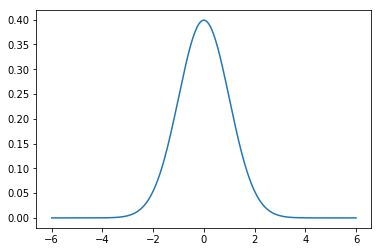

In [45]:
xs = np.linspace(-6,6,300)
normal = stats.norm.pdf(xs)
plt.plot(xs, normal)


0.09623477364957495
4.995936777167455
[0.         0.00495588 0.06930226 0.20582204 0.36353073 0.50309847
 0.6084002  0.67762184 0.71532267 0.72799033 0.72198189 0.70273976
 0.67461186 0.64092702 0.60415729 0.56609225 0.52799525 0.4907328
 0.45487701 0.42078469 0.38865725 0.35858566 0.33058373 0.30461262
 0.28059876 0.25844682 0.238049   0.21929162 0.20205975 0.1862403
 0.17172417 0.15840752 0.14619253 0.1349878  0.1247084  0.11527583
 0.10661775 0.09866774 0.09136491 0.08465355 0.07848278 0.07280615
 0.06758129 0.06276959 0.05833586 0.05424805 0.05047696 0.04699599
 0.0437809  0.0408096  0.03806197 0.03551964 0.03316586 0.03098536
 0.02896419 0.02708959 0.02534993 0.02373456 0.02223373 0.02083854
 0.01954082 0.01833309 0.01720849 0.01616074 0.01518405 0.01427312
 0.01342309 0.01262946 0.01188813 0.01119529 0.01054745 0.0099414
 0.00937416 0.00884299 0.00834537 0.00787895 0.0074416  0.0070313
 0.00664621 0.00628462 0.00594496 0.00562576 0.00532565 0.00504339
 0.00477779 0.00452778 0.004

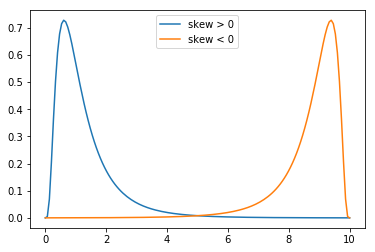

In [47]:
xs2 = np.linspace(0, 10, 150)

print(stats.lognorm.ppf(0.01, 0.7, loc=-0.1))
print(stats.lognorm.ppf(0.99, 0.7, loc=-0.1))

lognormal = stats.lognorm.pdf(xs2, 0.7)
print(lognormal)
plt.plot(xs2, lognormal, label = 'skew > 0')

plt.plot(xs2, lognormal[::-1], label = 'skew < 0')
plt.legend()

In [48]:
!pip install pandas-datareader
from datetime import datetime
import pandas_datareader as pdr

-0.5999713903435585
0.00031696537647242626
0.008160010969173544


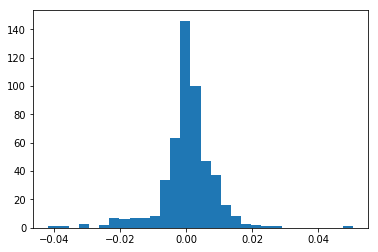

In [49]:
prices =  pdr.data.DataReader('SPY', data_source='yahoo', start=datetime(2017,1,1), end=datetime(2019,1,1)).iloc[:, -1]

returns = prices.pct_change()[1:]

plt.hist(returns, 30)

print(stats.skew(returns))
print(np.mean(returns))
print(np.std(returns))

excess kurtosis leptocurtic:  3.0
excess kurtosis leptocurtic:  0.0
excess kurtosis leptocurtic:  -0.5937628755982794


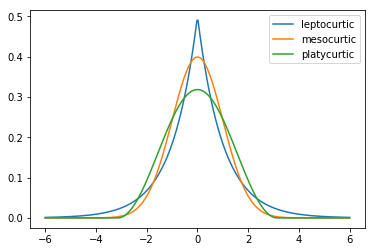

In [52]:
plt.plot(xs, stats.laplace.pdf(xs), label = 'leptocurtic')
print('excess kurtosis leptocurtic: ', stats.laplace.stats(moments='k'))

plt.plot(xs, normal, label = 'mesocurtic')
print('excess kurtosis leptocurtic: ', stats.norm.stats(moments='k'))

plt.plot(xs, stats.cosine.pdf(xs), label='platycurtic')
print('excess kurtosis leptocurtic: ', stats.cosine.stats(moments='k'))

plt.legend()

In [53]:
print('s&p returns kurtosis ' , stats.kurtosis(returns))

s&p returns kurtosis  6.58808673825599


In [67]:
from statsmodels.stats.stattools import jarque_bera

#null hypothesis = normal distribution
# thus p values < 0.05 indicates non normal distribution

N=1000
M=1000

pvalues = np.ndarray((N))

for i in range(N):
    X = np.random.normal(0,1, M)
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
num_significant = len(pvalues[pvalues < 0.05])

print(float(num_significant) / N)

0.06


In [71]:
_, pvalue, _, _ = jarque_bera(returns)

if pvalue > 0.05:
    print('returns are likely normal')
else:
    print('returns are likely not normal')

returns are likely not normal
